# Questão 1. Considerando o sistema elétrico da Figura 1, operando a 60 Hz, cujos parâmetros do sistema são conforme a seguir:

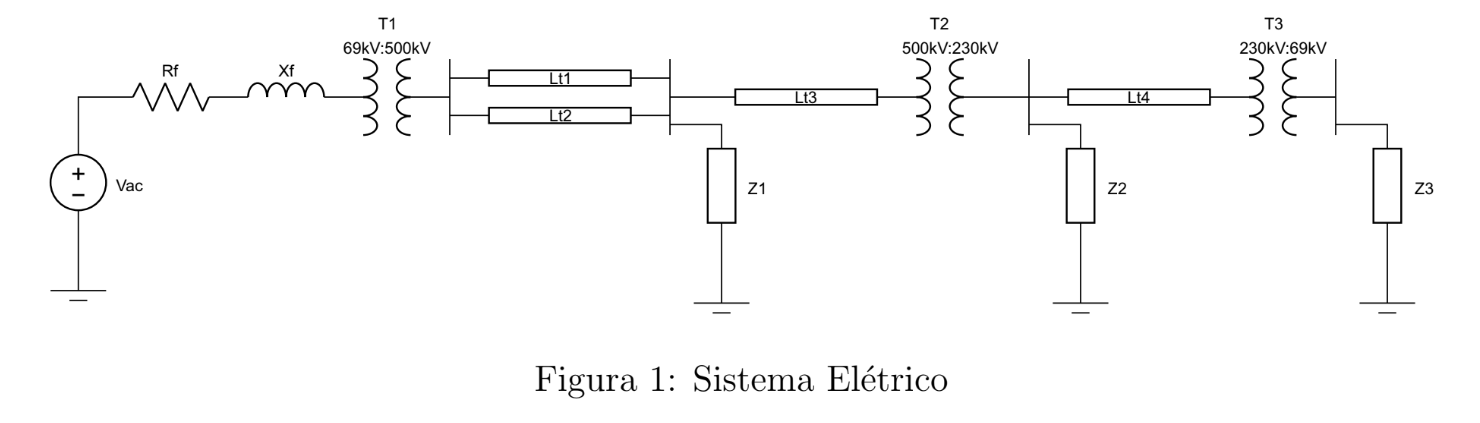

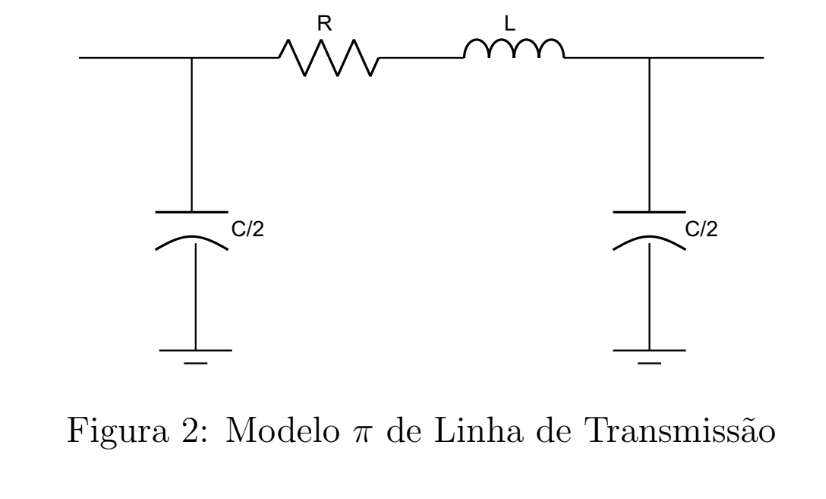

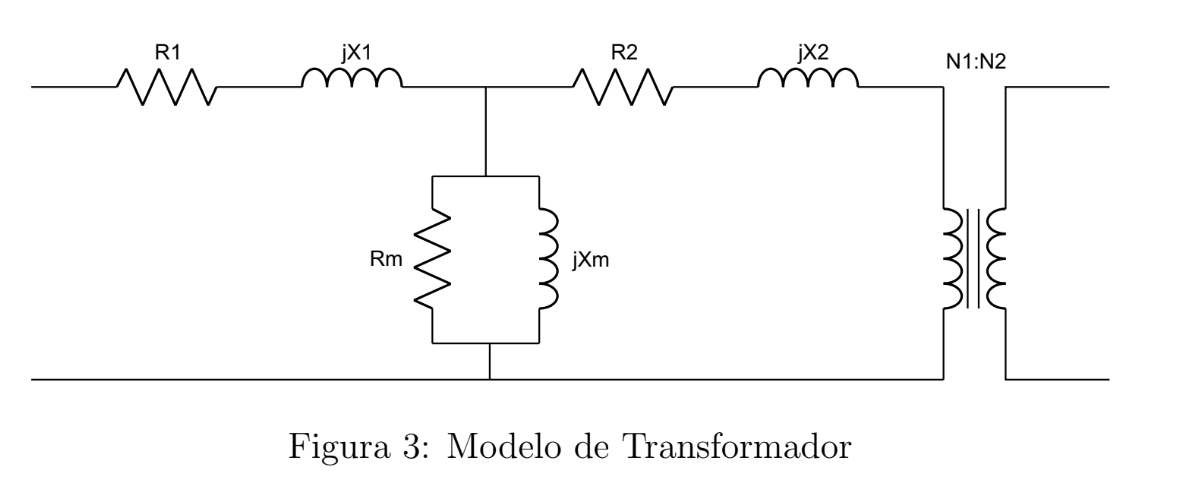

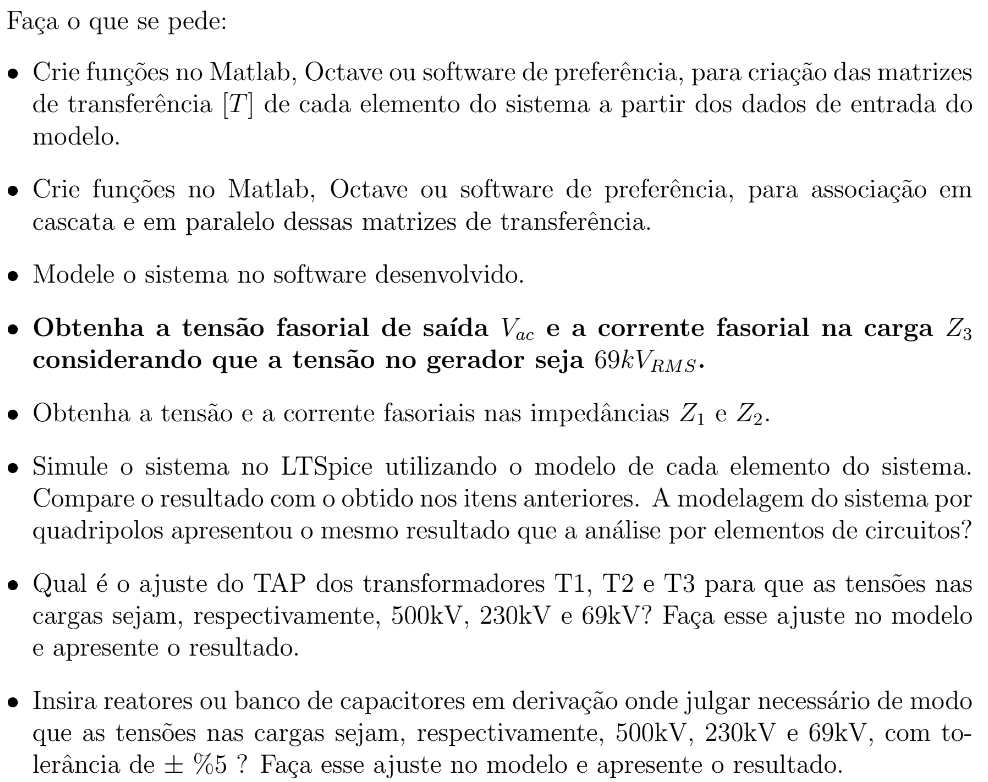

In [120]:
import numpy as np
import cmath

#Distancia das Linhas de transmissão (km):  ✓
dLT1 = 100
dLT2 = dLT1
dLT3 = dLT1
dLT4 = 80
dLT5 = dLT4
dLT6 = 120

#Trasformadores:  ✓
#Parâmetros: [v1,v2,Rm,Xm]
Trafo1 = [69,500,4320,5050]
Trafo2 = [500,230,432000,505000]
Trafo3 = [230,69,402000,607000]

# Impedancia serie Thévenin::  ✓
Rf = 4
Xf = 0.38
Zf = Rf + 1j*Xf

w = 2*np.pi*60   #✓

# Cargas:  ✓
Z1 = 8400    +  1j*w*46
Z2 = 1175.55 +  1j*w*6.43
Z3 = 529     +  1j*w*2.9

def ParametrosLinhaDeTransmissao(Distancia): #✓
    #R(ohm), L(H), Cap(F)
    return [0.182*Distancia,2.28E-3*Distancia,0.014E-6*Distancia]

def LinhaDeTransmissao(Distancia):   #✓
    w = 2*np.pi*60 # rad/s

    Parametros = ParametrosLinhaDeTransmissao(Distancia) #R(ohm), L(H), Cap(F)
    R = Parametros[0]
    L = Parametros[1]
    Cap = Parametros[2]

    A = 1+(1j*w*Cap*R - (w**2)*L*Cap)/2
    B = R + 1j*w*L  #✓
    C = 1j*w*Cap - (R + 1j*w*L)*((w*Cap)**2)
    D = 1+(1j*w*Cap*R - (w**2)*L*Cap)/2

    matriz = np.array(
        [
            [A,B],
            [C,D]
        ]
    )
    return matriz


def Transformador(Trafo): #✓ Conferido-Ygor
    R1 = 7.6E-3
    X1 = 3.8E-3
    R2 = 33.9E-3
    X2 = 0.85E-3   #✓
    v1 = Trafo[0]
    v2 = Trafo[1]
    Rm = Trafo[2]
    Xm = Trafo[3]


    Z1 = R1+1j*X1
    Z2 = R2+1j*X2
    Y = (Rm + 1j*Xm)/(1j*Rm*Xm)
    N = v2/v1
    A = (1/N)*(1 + Y*Z1)
    B = N*(Z1+Z2+Y*Z1*Z2)
    C = (1/N)*Y
    D = N*(1+Y*Z2)

    matriz = np.array(
        [
            [A,B],
            [C,D]
        ]
    )
    return matriz

def Carga(Z):  #✓
    A = 1
    B = Z
    C = 0
    D = 1

    matriz = np.array(
        [
            [A,B],
            [C,D]
        ]
    )

    return matriz

def CargaDerivada(Z): #✓
    A = 1
    B = 0
    C = 1/Z
    D = 1

    matriz = np.array(
        [
            [A,B],
            [C,D]
        ]
    )

    return matriz

def AssociarMatrizesCascata(matriz1,matriz2):  #✓ (Está correto. Poderia ter usado np.dot(matriz1,matriz2) )
    A = matriz1[0][0]*matriz2[0][0] + matriz1[0][1]*matriz2[1][0]
    B = matriz1[0][0]*matriz2[0][1] + matriz1[0][1]*matriz2[1][1]
    C = matriz1[1][0]*matriz2[0][0] + matriz1[1][1]*matriz2[1][0]
    D = matriz1[1][0]*matriz2[0][1] + matriz1[1][1]*matriz2[1][1]

    matriz = np.array(
        [
            [A,B],
            [C,D]
        ]
    )

    return matriz

def AssociarMatrizesParalelo(matriz1,matriz2):   #✓
    Aa = matriz1[0][0]
    Ba = matriz1[0][1]
    Ca = matriz1[1][0]
    Da = matriz1[1][1]
    Ab = matriz2[0][0]
    Bb = matriz2[0][1]
    Cb = matriz2[1][0]
    Db = matriz2[1][1]

    A = (Aa*Bb + Ab*Ba)/(Ba + Bb)
    B = (Ba*Bb)/(Ba + Bb)
    C = Ca + Cb + ((Aa - Ab)*(Db - Da))/(Ba + Bb)
    D = (Bb*Da + Ba*Db)/(Ba + Bb)

    matriz = np.array(
        [
            [A,B],
            [C,D]
        ]
    )

    return matriz

zth = Carga(Zf)  #✓
T1 = Transformador(Trafo1)  #✓
LT1 = LinhaDeTransmissao(dLT1)  #✓
T2 = Transformador(Trafo2)  #✓
LT2 = LinhaDeTransmissao(dLT2)  #✓
T3 = Transformador(Trafo3)  #✓
LT3 = LinhaDeTransmissao(dLT3)  #✓
z1 = CargaDerivada(Z1)  #✓
LT4 = LinhaDeTransmissao(dLT4)  #✓
z2 = CargaDerivada(Z2)  #✓
z3 = CargaDerivada(Z3)  #✓

# Associar Matrizes:
matriz1 = AssociarMatrizesCascata(zth, T1)  #✓
matriz2 = AssociarMatrizesCascata(matriz1, AssociarMatrizesParalelo(LT1,LT2))  #✓
matriz3 = AssociarMatrizesCascata(matriz2, z1)  #✓
matriz4 = AssociarMatrizesCascata(matriz3, LT3)  #✓
matriz5 = AssociarMatrizesCascata(matriz4, T2)  #✓
matriz6 = AssociarMatrizesCascata(matriz5, z2)  #✓
matriz7 = AssociarMatrizesCascata(matriz6, LT4)  #✓
matriz8 = AssociarMatrizesCascata(matriz7, T3)  #✓

print(f"T = {matriz8}")
print()
# Parte 1: Encontrar V e I em Z3
print("Tensão e corrente na carga Z3:")
V1 = 69E3
V2 = (V1*Z3)/(matriz8[0][0]*Z3 + matriz8[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z3
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")
print()

# Parte 2: Encontrar V e I em Z2
print("Tensão e corrente na carga Z2:")
V1 = 69E3 #✓
V2 = (V1*Z2)/(matriz5[0][0]*Z2 + matriz5[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z2
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")
print()

# Parte 3: Encontrar V e I em Z1
print("Tensão e corrente na carga Z1:")
V1 = 69E3
V2 = (V1*Z1)/(matriz2[0][0]*Z1 + matriz2[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z1
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")

T = [[8.98926971e-01+0.32466321j 3.25955717e+00+8.9648104j ]
 [1.61163931e-03+0.07471429j 4.18868001e-01+0.13745728j]]

Tensão e corrente na carga Z3:
V2 = (67411.73660952768-24196.545313210074j) V
I2 = (6.241891389945689-58.64015954677755j) A
V2 = 71622.73 ∠ -19.74° V
I2 = 58.97 ∠ -83.92° A

Tensão e corrente na carga Z2:
V2 = (223616.83888714283-74335.79486421724j) V
I2 = (11.391491251158108-86.72482852298634j) A
V2 = 235648.68 ∠ -18.39° V
I2 = 87.47 ∠ -82.52° A

Tensão e corrente na carga Z1:
V2 = (495518.4753793254-107518.68195131577j) V
I2 = (6.1887075447715825-25.576276164614146j) A
V2 = 507049.14 ∠ -12.24° V
I2 = 26.31 ∠ -76.40° A


**A seguir a questão que pede o ajuste de TAP do transformador
Para realizar esse ajuste será modificado o valor de V2**

In [ ]:

#Parâmetros: [v1,v2,Rm,Xm]
Trafo1 = [69,493.0488591,4320,5050]
Trafo2 = [500,227.1918885,432000,505000]
Trafo3 = [230,68.07012266,402000,607000]

zth = Carga(Zf)  #✓
T1 = Transformador(Trafo1)  #✓
LT1 = LinhaDeTransmissao(dLT1)  #✓
T2 = Transformador(Trafo2)  #✓
LT2 = LinhaDeTransmissao(dLT2)  #✓
T3 = Transformador(Trafo3)  #✓
LT3 = LinhaDeTransmissao(dLT3)  #✓
z1 = CargaDerivada(Z1)  #✓
LT4 = LinhaDeTransmissao(dLT4)  #✓
z2 = CargaDerivada(Z2)  #✓
z3 = CargaDerivada(Z3)  #✓

# Associar Matrizes:
matriz1 = AssociarMatrizesCascata(zth, T1)  #✓
matriz2 = AssociarMatrizesCascata(matriz1, AssociarMatrizesParalelo(LT1,LT2))  #✓
matriz3 = AssociarMatrizesCascata(matriz2, z1)  #✓
matriz4 = AssociarMatrizesCascata(matriz3, LT3)  #✓
matriz5 = AssociarMatrizesCascata(matriz4, T2)  #✓
matriz6 = AssociarMatrizesCascata(matriz5, z2)  #✓
matriz7 = AssociarMatrizesCascata(matriz6, LT4)  #✓
matriz8 = AssociarMatrizesCascata(matriz7, T3)  #✓

print(f"T = {matriz8}")
print()
# Parte 1: Encontrar V e I em Z3
print("Tensão e corrente na carga Z3:")
V1 = 69E3
V2 = (V1*Z3)/(matriz8[0][0]*Z3 + matriz8[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z3
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")
print()

# Parte 2: Encontrar V e I em Z2
print("Tensão e corrente na carga Z2:")
V1 = 69E3 #✓
V2 = (V1*Z2)/(matriz5[0][0]*Z2 + matriz5[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z2
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")
print()

# Parte 3: Encontrar V e I em Z1
print("Tensão e corrente na carga Z1:")
V1 = 69E3
V2 = (V1*Z1)/(matriz2[0][0]*Z1 + matriz2[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z1
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")



T = [[9.36027574e-01+0.32893483j 3.15892560e+00+8.98811932j]
 [1.59946320e-03+0.07557979j 3.91479818e-01+0.13453374j]]

Tensão e corrente na carga Z3:
V2 = (65151.13338369721-22766.945823387283j) V
I2 = (6.490747595919222-56.45200943428336j) A
V2 = 69014.52 ∠ -19.26° V
I2 = 56.82 ∠ -83.44° A

Tensão e corrente na carga Z2:
V2 = (218881.89656748748-70903.04481849178j) V
I2 = (11.771075864654373-84.58743167401592j) A
V2 = 230079.39 ∠ -17.95° V
I2 = 85.40 ∠ -82.08° A

Tensão e corrente na carga Z1:
V2 = (489586.5306021951-103313.94564273j) V
I2 = (6.2508919120062405-25.204090400618746j) A
V2 = 500368.61 ∠ -11.92° V
I2 = 25.97 ∠ -76.07° A


Relações **antes** do ajuste de TAP:

1.   T1--> 69KV:500KV n=7.24
2.   T2--> 500KV:230KV n=0.46
3.   T3--> 230KV:69KV n=0.3


Relações **depois** do ajuste de TAP:

1.   T1--> 69KV:493.0489KV n=7.1456
2.   T2--> 500KV:227.1919KV n=0.4544
3.   T3--> 230KV:68.0701KV n=0.2960

**Resolveremos agora a última questão no que diz respeito a inclusão de um reator ou banco de capacitores no modelo, nesse caso usaremos um reator.**

In [119]:
#Distancia das Linhas de transmissão (km):  ✓
dLT1 = 100
dLT2 = dLT1
dLT3 = dLT1
dLT4 = 80
dLT5 = dLT4
dLT6 = 120

#Trasformadores:  ✓
#Parâmetros: [v1,v2,Rm,Xm]
Trafo1 = [69,500,4320,5050]
Trafo2 = [500,230,432000,505000]
Trafo3 = [230,69,402000,607000]

# Impedancia serie Thévenin::  ✓
Rf = 4
Xf = 0.38
Zf = Rf + 1j*Xf

w = 2*np.pi*60   #✓

# Cargas:  ✓
Z1 = 8400    +  1j*w*46
Z2 = 1175.55 +  1j*w*6.43
Z3 = 529     +  1j*w*2.9
reator1 = 1j*w*50.8
reator2=  1j*w*+2.2
reator3=  1j*w*7

zreator1 = CargaDerivada(reator1)
zreator2 = CargaDerivada(reator2)
zreator3 = CargaDerivada(reator3)

zth = Carga(Zf)  #✓
T1 = Transformador(Trafo1)  #✓
LT1 = LinhaDeTransmissao(dLT1)  #✓
T2 = Transformador(Trafo2)  #✓
LT2 = LinhaDeTransmissao(dLT2)  #✓
T3 = Transformador(Trafo3)  #✓
LT3 = LinhaDeTransmissao(dLT3)  #✓
z1 = CargaDerivada(Z1)  #✓
LT4 = LinhaDeTransmissao(dLT4)  #✓
z2 = CargaDerivada(Z2)  #✓
z3 = CargaDerivada(Z3)  #✓

# Associar Matrizes:
matriz1 = AssociarMatrizesCascata(zth, T1)  #✓
matriz2 = AssociarMatrizesCascata(matriz1, AssociarMatrizesParalelo(LT1,LT2))  #✓
matrizreator1= AssociarMatrizesCascata(matriz2,zreator1)
matriz3 = AssociarMatrizesCascata(matrizreator1, z1)  #✓
matriz4 = AssociarMatrizesCascata(matriz3, LT3)  #✓
matriz5 = AssociarMatrizesCascata(matriz4, T2)  #✓
matrizreator2= AssociarMatrizesCascata(matriz5,zreator2)
matriz6 = AssociarMatrizesCascata(matrizreator2, z2)  #✓
matriz7 = AssociarMatrizesCascata(matriz6, LT4)  #✓
matriz8 = AssociarMatrizesCascata(matriz7, T3)  #✓
matrizreator3= AssociarMatrizesCascata(matriz8,zreator3)

print(f"T = {matrizreator3}")
print()
# Parte 1: Encontrar V e I em Z3
print("Tensão e corrente na carga Z3:")
V1 = 69E3
V2 = (V1*Z3)/(matrizreator3[0][0]*Z3 + matrizreator3[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z3
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")
print()

# Parte 2: Encontrar V e I em Z2
print("Tensão e corrente na carga Z2:")
V1 = 69E3 #✓
V2 = (V1*Z2)/(matrizreator2[0][0]*Z2 + matrizreator2[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z2
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")
print()

# Parte 3: Encontrar V e I em Z1
print("Tensão e corrente na carga Z1:")
V1 = 69E3
V2 = (V1*Z1)/(matrizreator1[0][0]*Z1 + matrizreator1[0][1])
print(f"V2 = {V2} V")
I2 = V2/Z1
print(f"I2 = {I2} A")
absV2, angV2 = cmath.polar(V2)
absI2, angI2 = cmath.polar(I2)
angV2 = np.rad2deg(angV2)
angI2 = np.rad2deg(angI2)
print(f"V2 = {absV2:.2f} ∠ {angV2:.2f}° V")
print(f"I2 = {absI2:.2f} ∠ {angI2:.2f}° A")

T = [[9.43641587e-01+0.2592508j  3.73690945e+00+9.13851269j]
 [2.10210595e-03+0.06035259j 5.12820089e-01+0.12013544j]]

Tensão e corrente na carga Z3:
V2 = (67471.79188729089-18414.792504207104j) V
I2 = (10.548620142712691-56.61120455607717j) A
V2 = 69939.60 ∠ -15.27° V
I2 = 57.59 ∠ -79.44° A

Tensão e corrente na carga Z2:
V2 = (223578.91617914263-56073.50413721509j) V
I2 = (17.48469625286704-83.75427046586658j) A
V2 = 230503.30 ∠ -14.08° V
I2 = 85.56 ∠ -78.21° A

Tensão e corrente na carga Z1:
V2 = (496296.61772211175-101516.06663401256j) V
I2 = (6.48667156632897-25.47681842779191j) A
V2 = 506572.64 ∠ -11.56° V
I2 = 26.29 ∠ -75.72° A
